## Pre processing of the data

In [1]:
import pandas as pd 
from textblob import TextBlob

#### Loading the tweets database

In [2]:
tweet_df = pd.read_csv("/Users/theohallouin/Desktop/Social_media/Goldenglobes.csv", encoding='latin-1') 

In [3]:
tweet_df

,id,screenName,location,text,created
0,1.610000e+18,AwardsRadar,"Brooklyn, NY",Final predictions for the #GoldenGlobes are up...,2023/1/9 23:55
1,1.610000e+18,ArrobaNerd,Brasil,Palpites e apostas para o Globo de Ouro 2023 n...,2023/1/9 23:55
2,1.610000e+18,SandyDunes3,NaN,#WhatTheActualFuck !!!\nThis just proves that ...,2023/1/9 23:50
3,1.610000e+18,GQMexico,NaN,Los Golden Globes tienen bastante historial de...,2023/1/9 23:50
4,1.610000e+18,flashallen19,NaN,Tomorrow is the golden globes \nAustin Butler ...,2023/1/9 23:49
...,...,...,...,...,...
15891,1.600000e+18,BrettBGowen,"Michigan, USA",Original Score\n1. Babylon\n2. GDT's Pinocchio...,2022/12/12 00:30
15892,1.600000e+18,ComicYears,NaN,The 2022 #GoldenGlobes feature several favorit...,2022/12/12 00:30
15893,1.600000e+18,BrettBGowen,"Michigan, USA",Just noticed GoldDerby is missing some categor...,2022/12/12 00:28
15894,1.600000e+18,BrettBGowen,"Michigan, USA","Alright I'll have a go, here are my final 2023...",2022/12/12 00:19


##### Loading the nominees database

In [4]:
nominees= pd.read_csv("/Users/theohallouin/Downloads/nominees.csv")

In [5]:
nominees

,nomination-db-card__name,nomination-db-card__name href,nomination-db-card__name href 2,nomination-db-card__nominee__label,nomination-db-card__award,nomination-db-card__award-film,nomination-db-card__award-film href,nomination-db-card__results 2,nomination-db-card__total-awards 3,nomination-db-card__results 3,...,nomination-db-card__results href 3,nomination-db-card__results 6,nomination-db-card__results href 4,nomination-db-card__total-awards 5,nomination-db-card__results 7,nomination-db-card__results href 5,nomination-db-card__results 8,nomination-db-card__results href 6,nomination-db-card__results 9,nomination-db-card__results href 7
0,Lesley Manville,https://www.goldenglobes.com/person/lesley-man...,https://www.goldenglobes.com/person/lesley-man...,Nominee,Best Actress - Motion Picture - Musical/Comedy,- Mrs. Harris Goes to Paris,https://www.goldenglobes.com/film/mrs-harris-g...,1 Nomination,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RRR,NaN,https://www.goldenglobes.com/film/rrr,Nominee,Best Picture - Non-English Language (formerly ...,- RRR,NaN,"2 Nominations, 1 Win",Music Score,M.M. Keeravaani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ke Huy Quan,https://www.goldenglobes.com/person/ke-huy-quan,https://www.goldenglobes.com/person/ke-huy-quan,Winner,Best Supporting Actor - Motion Picture,- Everything Everywhere All at Once,https://www.goldenglobes.com/film/everything-e...,"1 Nomination, 1 Win",Director,"Daniel Kwan,",...,https://www.goldenglobes.com/person/daniel-kwan,Daniel Scheinert,https://www.goldenglobes.com/person/daniel-sch...,Cast,"Michelle Yeoh,",https://www.goldenglobes.com/person/michelle-yeoh,"Ke Huy Quan,",https://www.goldenglobes.com/person/ke-huy-quan,"Jamie Lee Curtis,",https://www.goldenglobes.com/person/jamie-lee-...
3,Decision to Leave,NaN,https://www.goldenglobes.com/film/decision-leave,Nominee,Best Picture - Non-English Language (formerly ...,- Decision to Leave,NaN,1 Nomination,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paul Walter Hauser,https://www.goldenglobes.com/person/paul-walte...,https://www.goldenglobes.com/person/paul-walte...,Winner,Best Supporting Actor - Television Limited Ser...,- Black Bird,https://www.goldenglobes.com/tv-show/black-bird,"1 Nomination, 1 Win",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Selena Gomez,https://www.goldenglobes.com/person/selena-gomez,https://www.goldenglobes.com/person/selena-gomez,Nominee,Best Television Actress - Musical/Comedy Series,- Only Murders in the Building,https://www.goldenglobes.com/tv-show/only-murd...,1 Nomination,Writer,Steve Martin,...,https://www.goldenglobes.com/person/martin-short,"Amy Ryan,",https://www.goldenglobes.com/person/amy-ryan,NaN,"Tina Fey,",https://www.goldenglobes.com/person/tina-fey,"Nathan Lane,",https://www.goldenglobes.com/person/nathan-lane,"Sting,",https://www.goldenglobes.com/person/sting
113,Lily James,https://www.goldenglobes.com/person/lily-james,https://www.goldenglobes.com/person/lily-james,Nominee,"Best Actress - Limited Series, Anthology Serie...",- Pam & Tommy,https://www.goldenglobes.com/tv-show/pam-tommy,1 Nomination,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Domhnall Gleeson,https://www.goldenglobes.com/person/domhnall-g...,https://www.goldenglobes.com/person/domhnall-g...,Nominee,Best Supporting Actor - Television Limited Ser...,"- Patient, The",https://www.goldenglobes.com/tv-show/patient,1 Nomination,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Henry Winkler,https://www.goldenglobes.com/person/henry-winkler,https://www.goldenglobes.com/person/henry-winkler,Nominee,Best Supporting Actor - Television Series,- Barry,https://www.goldenglobes.com/tv-show/barry,"7 Nominations, 2 Wins",Cast,"Bill Hader,",...,https://www.goldenglobes.com/person/jon-hamm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Cleaning up the data

In [6]:
Nominees_clean = pd.read_csv("/Users/theohallouin/Downloads/nominees.csv", usecols=['nomination-db-card__name', 'nomination-db-card__nominee__label', 'nomination-db-card__award'])

In [7]:
Nominees_clean

,nomination-db-card__name,nomination-db-card__nominee__label,nomination-db-card__award
0,Lesley Manville,Nominee,Best Actress - Motion Picture - Musical/Comedy
1,RRR,Nominee,Best Picture - Non-English Language (formerly ...
2,Ke Huy Quan,Winner,Best Supporting Actor - Motion Picture
3,Decision to Leave,Nominee,Best Picture - Non-English Language (formerly ...
4,Paul Walter Hauser,Winner,Best Supporting Actor - Television Limited Ser...
...,...,...,...
112,Selena Gomez,Nominee,Best Television Actress - Musical/Comedy Series
113,Lily James,Nominee,"Best Actress - Limited Series, Anthology Serie..."
114,Domhnall Gleeson,Nominee,Best Supporting Actor - Television Limited Ser...
115,Henry Winkler,Nominee,Best Supporting Actor - Television Series


#### Keeping only the data for the actor/actress

In [8]:
df = Nominees_clean[Nominees_clean['nomination-db-card__award'].str.contains('Actor|Actress')]

In [9]:
df

,nomination-db-card__name,nomination-db-card__nominee__label,nomination-db-card__award
0,Lesley Manville,Nominee,Best Actress - Motion Picture - Musical/Comedy
2,Ke Huy Quan,Winner,Best Supporting Actor - Motion Picture
4,Paul Walter Hauser,Winner,Best Supporting Actor - Television Limited Ser...
5,Michelle Williams,Nominee,Best Actress - Motion Picture - Drama
7,Janelle James,Nominee,Best Supporting Actress - Television Series
...,...,...,...
110,Diego Luna,Nominee,Best Television Actor - Drama Series
112,Selena Gomez,Nominee,Best Television Actress - Musical/Comedy Series
113,Lily James,Nominee,"Best Actress - Limited Series, Anthology Serie..."
114,Domhnall Gleeson,Nominee,Best Supporting Actor - Television Limited Ser...


#### Filter the tweets that mention at least on actor/actress

In [10]:
# Create a list of actor names
actor_names = df['nomination-db-card__name'].tolist()

# Create a filter to keep only tweets that mention at least one actor
filter = tweet_df['text'].str.contains('|'.join(actor_names))

# Apply the filter to the tweets DataFrame
filtered_tweets_df = tweet_df[filter]

# Print the filtered tweets DataFrame
print(filtered_tweets_df)

                 id       screenName                      location  \
4      1.610000e+18     flashallen19                           NaN   
11     1.610000e+18  melissasprofile                           NaN   
20     1.610000e+18     ClaroVideoMx                       MÃ©xico   
21     1.610000e+18       ClaroVideo                           NaN   
24     1.610000e+18    Allisonvive23  ItuzaingÃ³ Centro, Argentina   
...             ...              ...                           ...   
15799  1.600000e+18    celsoguerrero                 Santo Domingo   
15800  1.600000e+18     NellieLaRoy_                      she/her    
15836  1.600000e+18         alexkokz                       Canada    
15877  1.600000e+18   ByClaytonDavis                 NYC - JC - LA   
15878  1.600000e+18   ByClaytonDavis                 NYC - JC - LA   

                                                    text           created  
4      Tomorrow is the golden globes \nAustin Butler ...    2023/1/9 23:49  
11   

#### Only keep the id, account name and text

In [11]:
tweet_clean_df = filtered_tweets_df[['id', 'screenName', 'text']]
tweet_clean_df

,id,screenName,text
4,1.610000e+18,flashallen19,Tomorrow is the golden globes \nAustin Butler ...
11,1.610000e+18,melissasprofile,They keep showing commercials for the #GoldenG...
20,1.610000e+18,ClaroVideoMx,Julia Roberts brilla en Gaslit y busca llevars...
21,1.610000e+18,ClaroVideo,Julia Roberts brilla en Gaslit y busca llevars...
24,1.610000e+18,Allisonvive23,Dolly de Leon-The Daniels- Brendan Fraser- Mic...
...,...,...,...
15799,1.600000e+18,celsoguerrero,#UnDiaComoHoy nacieron\n-Jennifer Connelly. #O...
15800,1.600000e+18,NellieLaRoy_,Fingers crossed for Margot Robbie and Diego Ca...
15836,1.600000e+18,alexkokz,OjalÃ¡ no nominen mÃ±ana a Brendan Fraser en l...
15877,1.600000e+18,ByClaytonDavis,#GoldenGlobes: Supporting Actor\n\n1. Ke Huy Q...


#### Only keep tweets in English  

In [12]:
# Define a function to detect the language of a tweet
def detect_language(text):
    blob = TextBlob(text)
    return blob.detect_language()




In [13]:
from langdetect import detect

# Define a function to detect the language of a given text
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
tweet_clean_df_copy = tweet_clean_df.copy()

# Apply the language detection function to the 'text' column
tweet_clean_df_copy.loc[:, 'language'] = tweet_clean_df_copy['text'].apply(detect_language)

# Filter the DataFrame to keep only the tweets in English
df_en = tweet_clean_df_copy[tweet_clean_df_copy['language'] == 'en']

In [14]:
df_en

,id,screenName,text,language
4,1.610000e+18,flashallen19,Tomorrow is the golden globes \nAustin Butler ...,en
11,1.610000e+18,melissasprofile,They keep showing commercials for the #GoldenG...,en
24,1.610000e+18,Allisonvive23,Dolly de Leon-The Daniels- Brendan Fraser- Mic...,en
41,1.610000e+18,UCanBetThat_,Who Wins Best Actor in a Motion Picture _ Dram...,en
60,1.610000e+18,LCWTAction,__BEST BETS__\n\nHighest conviction #GoldenGlo...,en
...,...,...,...,...
15772,1.600000e+18,jazzt,#GoldenGlobes nominations incoming in just und...,en
15799,1.600000e+18,celsoguerrero,#UnDiaComoHoy nacieron\n-Jennifer Connelly. #O...,en
15800,1.600000e+18,NellieLaRoy_,Fingers crossed for Margot Robbie and Diego Ca...,en
15877,1.600000e+18,ByClaytonDavis,#GoldenGlobes: Supporting Actor\n\n1. Ke Huy Q...,en


In [15]:
# Save the English tweet data to a CSV file
df_en.to_csv('english_tweets.csv', index=False)

#### Sentiment analysis for each tweet 

In [16]:
from textblob import TextBlob

# Define a function to get the sentiment of a given text
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

df_en_copy = df_en.copy()
df_en_copy['sentiment'] = df_en_copy['text'].apply(get_sentiment)

# Print the first 10 rows of the English tweets DataFrame, including the sentiment scores
print(df_en_copy.head(10))

               id       screenName  \
4    1.610000e+18     flashallen19   
11   1.610000e+18  melissasprofile   
24   1.610000e+18    Allisonvive23   
41   1.610000e+18     UCanBetThat_   
60   1.610000e+18       LCWTAction   
88   1.610000e+18   cinergiaonline   
102  1.610000e+18         DEADLINE   
136  1.610000e+18  MidnightCriticC   
161  1.610000e+18   SGomezNewsCOMs   
166  1.610000e+18    SenoritaDalal   

                                                  text language  sentiment  
4    Tomorrow is the golden globes \nAustin Butler ...       en      0.300  
11   They keep showing commercials for the #GoldenG...       en      0.000  
24   Dolly de Leon-The Daniels- Brendan Fraser- Mic...       en      0.000  
41   Who Wins Best Actor in a Motion Picture _ Dram...       en      0.600  
60   __BEST BETS__\n\nHighest conviction #GoldenGlo...       en      0.675  
88   Jenna Ortega, Letitia Wright, Ana de Armas, Ja...       en      0.000  
102  More #GoldenGlobes presenters announc

In [17]:
pd.reset_option('display.max_colwidth')

#### Sorted by the score 

In [18]:
df_en_sorted = df_en_copy.sort_values('sentiment', ascending=False)

# Print the first 10 rows of the sorted DataFrame
print(df_en_sorted.head(10))

                 id       screenName  \
13411  1.600000e+18         PopCrave   
14131  1.600000e+18       moviesndtv   
11919  1.600000e+18         SandraMG   
15089  1.600000e+18        newsandor   
13975  1.600000e+18       moviesndtv   
11729  1.600000e+18  KalyanFollower_   
6914   1.600000e+18  MoviesThatMaher   
6929   1.600000e+18  MoviesThatMaher   
11715  1.600000e+18        DaricCott   
7028   1.600000e+18  MoviesThatMaher   

                                                    text language  sentiment  
13411  #GoldenGlobes: Best Performance by an Actress ...       en        1.0  
14131  #GoldenGlobes Best Actress (Drama) nominees: C...       en        1.0  
11919  Best Actor (Drama Series): DIEGO. LUNA. SUPREM...       en        1.0  
15089  Diego Luna was nominated for Best Actor in a T...       en        1.0  
13975  #GoldenGlobes Best Actress (Musical/Comedy) no...       en        1.0  
11729  #GoldenGlobes nominations\n\nBest Actress - Ma...       en        1.0  
6914  

#### Sentiment score mean for every tweet mentioning at least once the actor 

In [19]:
import pandas as pd
from textblob import TextBlob

# Define a function to get the sentiment of a given text
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment
# Create a copy of the df_en DataFrame to avoid modifying the original
df_en_copy = df_en.copy()

# Apply the sentiment analysis function to the 'text' column of the English tweets DataFrame
df_en_copy['Sentiment'] = df_en_copy['text'].apply(get_sentiment)

# Create a new DataFrame to store the actor sentiment averages
actor_sentiments = pd.DataFrame(columns=['Actor', 'Sentiment'])

# Loop through each actor in the df DataFrame
for actor in df['nomination-db-card__name']:
    actor_tweets = df_en_copy[df_en_copy['text'].str.contains(actor)]
    if not actor_tweets.empty:
        actor_sentiment = actor_tweets['Sentiment'].mean()
        actor_sentiments = pd.concat([actor_sentiments, pd.DataFrame({'Actor': [actor], 'Sentiment': [actor_sentiment]})])

actor_sentiments = actor_sentiments.sort_values(by='Sentiment', ascending=False)
# Add a new column with the rank of each actor based on their sentiment score
actor_sentiments['Rank'] = actor_sentiments['Sentiment'].rank(method='dense', ascending=False).astype(int)

# Print the resulting dataframe
print(actor_sentiments)
 


                Actor  Sentiment  Rank
0       Barry Keoghan   0.505998     1
0       Margot Robbie   0.501662     2
0           Brad Pitt   0.499940     3
0     Brendan Gleeson   0.495103     4
0      Eddie Redmayne   0.491949     5
..                ...        ...   ...
0      Sebastian Stan   0.090805    64
0   Daisy Edgar-Jones   0.075280    65
0       Taron Egerton   0.075254    66
0         Colin Firth   0.071510    67
0    Niecy Nash-Betts   0.054455    68

[69 rows x 3 columns]


In [20]:
pd.set_option('display.max_rows', 20)
actor_sentiments 

,Actor,Sentiment,Rank
0,Barry Keoghan,0.505998,1
0,Margot Robbie,0.501662,2
0,Brad Pitt,0.499940,3
0,Brendan Gleeson,0.495103,4
0,Eddie Redmayne,0.491949,5
...,...,...,...
0,Sebastian Stan,0.090805,64
0,Daisy Edgar-Jones,0.075280,65
0,Taron Egerton,0.075254,66
0,Colin Firth,0.071510,67


#### PLot of the top 20 actors per sentiment score

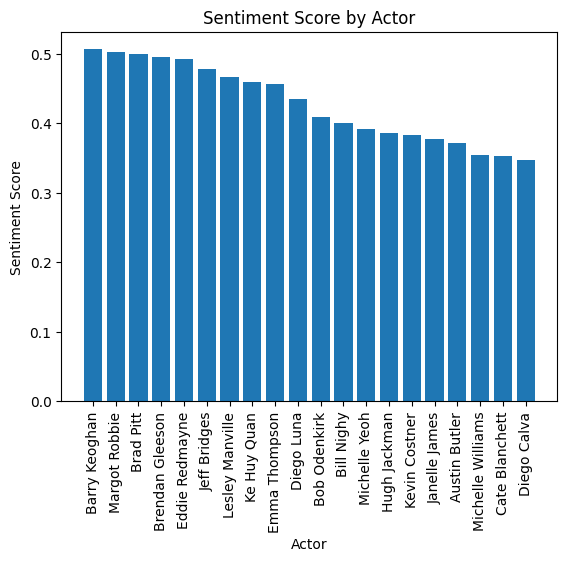

In [21]:
import matplotlib.pyplot as plt
# Sort the actors by their sentiment score
actor_sentiments_sorted = actor_sentiments.head(20)

# Create the bar plot
plt.bar(actor_sentiments_sorted['Actor'], actor_sentiments_sorted['Sentiment'])

# Set the title and axis labels
plt.title('Sentiment Score by Actor')
plt.xlabel('Actor')
plt.ylabel('Sentiment Score')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Display the plot
plt.show()

#### Wordcloud for every tweet 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/theohallouin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


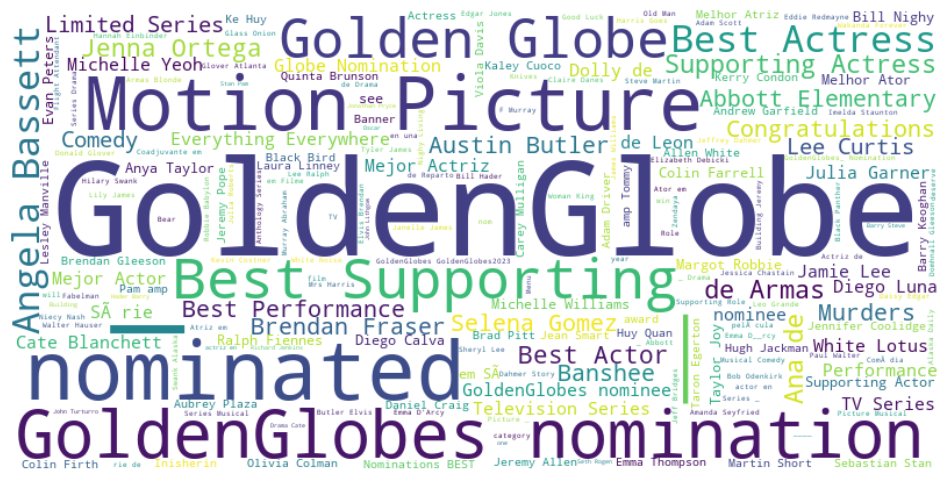

<Figure size 640x480 with 0 Axes>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')



# Join all tweets into a single string
all_tweets = ' '.join(df_en['text'])

# Create a set of stopwords to remove from the word cloud
stopwords = set(STOPWORDS)
stopwords.update(['http', 'co', 'rt','https','t'])

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', max_words=200, width=800, height=400).generate(all_tweets)

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud.png')

#### NRC score for every tweets 

In [23]:
from nrclex import NRCLex
import pandas as pd
import nltk
nltk.download('punkt')



# Create a new dataframe to store the NRC results
nrc_results = pd.DataFrame(columns=['Id', 'Text', 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Negative', 'Positive', 'Sadness', 'Surprise', 'Trust'])

# Loop through each row in the dataframe
for index, row in df_en.iterrows():
    # Get the text from the current row
    text = row['text']
    
    # Perform NRC analysis on the text
    nrc = NRCLex(text)
    
    # Extract the NRC results for each emotion
    results = nrc.affect_frequencies
    
    # Add the results to the new dataframe
    nrc_results = nrc_results.append({'Id': row['id'], 'Text': text, 'Anger': results['anger'], 'Disgust': results['disgust'], 'Fear': results['fear'], 'Joy': results['joy'], 'Negative': results['negative'], 'Positive': results['positive'], 'Sadness': results['sadness'], 'Surprise': results['surprise'], 'Trust': results['trust']}, ignore_index=True)

# Print the new dataframe with the NRC results
print(nrc_results)

nrc_results.to_csv('nrc_results.csv')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/theohallouin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/2b/s22g68wj13g2y3cc530jl5vc0000gn/T/ipykernel_40654/3246545409.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nrc_results = nrc_results.append({'Id': row['id'], 'Text': text, 'Anger': results['anger'], 'Disgust': results['disgust'], 'Fear': results['fear'], 'Joy': results['joy'], 'Negative': results['negative'], 'Positive': results['positive'], 'Sadness': results['sadness'], 'Surprise': results['surprise'], 'Trust': results['trust']}, ignore_index=True)
/var/folders/2b/s22g68wj13g2y3cc530jl5vc0000gn/T/ipykernel_40654/3246545409.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nrc_results = nrc_results.append({'Id': row['id'], 'Text': text, 'Anger': r

                Id                                               Text  \
0     1.610000e+18  Tomorrow is the golden globes \nAustin Butler ...   
1     1.610000e+18  They keep showing commercials for the #GoldenG...   
2     1.610000e+18  Dolly de Leon-The Daniels- Brendan Fraser- Mic...   
3     1.610000e+18  Who Wins Best Actor in a Motion Picture _ Dram...   
4     1.610000e+18  __BEST BETS__\n\nHighest conviction #GoldenGlo...   
...            ...                                                ...   
1861  1.600000e+18  #GoldenGlobes nominations incoming in just und...   
1862  1.600000e+18  #UnDiaComoHoy nacieron\n-Jennifer Connelly. #O...   
1863  1.600000e+18  Fingers crossed for Margot Robbie and Diego Ca...   
1864  1.600000e+18  #GoldenGlobes: Supporting Actor\n\n1. Ke Huy Q...   
1865  1.600000e+18  #GoldenGlobes: Actress (Comedy)\n1. Michelle Y...   

         Anger Anticipation  Disgust  Fear       Joy  Negative  Positive  \
0     0.100000          NaN      0.1   0.1  0.1

/var/folders/2b/s22g68wj13g2y3cc530jl5vc0000gn/T/ipykernel_40654/3246545409.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nrc_results = nrc_results.append({'Id': row['id'], 'Text': text, 'Anger': results['anger'], 'Disgust': results['disgust'], 'Fear': results['fear'], 'Joy': results['joy'], 'Negative': results['negative'], 'Positive': results['positive'], 'Sadness': results['sadness'], 'Surprise': results['surprise'], 'Trust': results['trust']}, ignore_index=True)


#### NRC score mean for every actor 

In [24]:

import pandas as pd


# create a new column in nrc_result that extracts the actor's name from the tweet text
nrc_results['actor'] = nrc_results['Text'].apply(lambda tweet: [name for name in df['nomination-db-card__name'] if name.lower() in tweet.lower()])

# explode the 'actor' column so that each row only contains one actor's name
nrc_result = nrc_results.explode('actor')

# group by actor and calculate the mean sentiment scores
sentiment_cols = ['Anger', 'Disgust', 'Fear', 'Joy', 'Negative', 'Positive', 'Sadness', 'Surprise', 'Trust']
actor_sentiment_means = nrc_result.groupby('actor')[sentiment_cols].mean()

# print the results
print(actor_sentiment_means)

actor_sentiment_means.to_csv ('actor_sentiment_means.csv')

                         Anger   Disgust      Fear       Joy  Negative  \
actor                                                                    
Adam Driver           0.023846  0.001299  0.001299  0.034659  0.012121   
Amanda Seyfried       0.012092  0.003268  0.003268  0.004902  0.012092   
Ana de Armas          0.013701  0.007230  0.012966  0.026051  0.036618   
Andrew Garfield       0.012162  0.002703  0.002703  0.005938  0.049324   
Angela Bassett        0.006325  0.005448  0.003972  0.023590  0.013964   
...                        ...       ...       ...       ...       ...   
Seth Rogen            0.007239  0.003378  0.008784  0.003378  0.090347   
Sheryl Lee Ralph      0.007349  0.002646  0.002646  0.008407  0.004703   
Taron Egerton         0.010317  0.003175  0.003175  0.003968  0.057937   
Tyler James Williams  0.003571  0.000000  0.000000  0.003571  0.000000   
Zendaya               0.000000  0.003305  0.000000  0.011566  0.018606   

                      Positive   Sadn

#### Radar plot for the top 5 actors

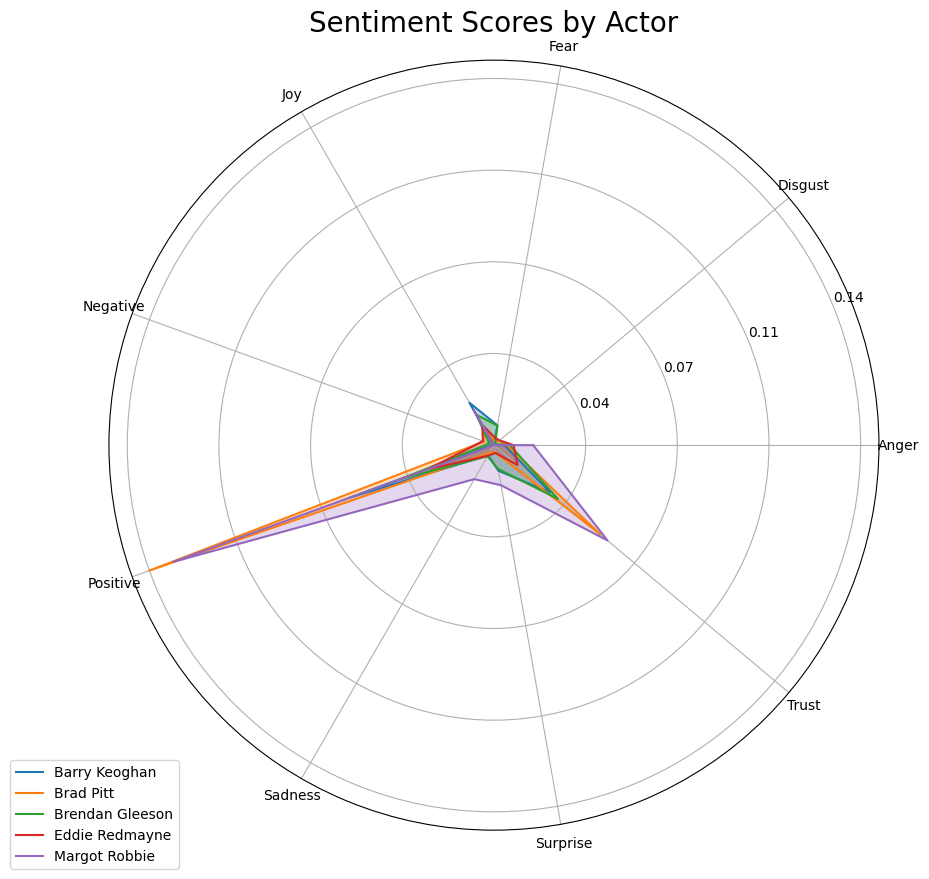

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


# create a new column in nrc_result that extracts the actor's name from the tweet text
nrc_result['actor'] = nrc_result['Text'].apply(lambda tweet: [name for name in df['nomination-db-card__name'] if name.lower() in tweet.lower()])

# explode the 'actor' column so that each row only contains one actor's name
nrc_result = nrc_result.explode('actor')

# filter the dataframe to only include the specified actors
actors_to_plot = ['Barry Keoghan', 'Margot Robbie', 'Brendan Gleeson', 'Brad Pitt', 'Eddie Redmayne']
nrc_result = nrc_result[nrc_result['actor'].isin(actors_to_plot)]

# group by actor and calculate the mean sentiment scores
sentiment_cols = ['Anger', 'Disgust', 'Fear', 'Joy', 'Negative', 'Positive', 'Sadness', 'Surprise', 'Trust']
actor_sentiment_means = nrc_result.groupby('actor')[sentiment_cols].mean()

# plot the radar chart
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)

# create a list of angles for each of the sentiment columns
angles = [n / float(len(sentiment_cols)) * 2 * 3.14159 for n in range(len(sentiment_cols))]
angles += angles[:1]

# plot each actor's sentiment scores on the radar chart
for i, actor in enumerate(actor_sentiment_means.index):
    scores = actor_sentiment_means.iloc[i].tolist()
    scores += scores[:1]
    ax.plot(angles, scores, label=actor)
    ax.fill(angles, scores, alpha=0.25)

# add legend and set title
ax.set_title('Sentiment Scores by Actor', fontsize=20)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# set the radial ticks and labels
max_val = actor_sentiment_means.max().max()
radial_ticks = [max_val * 0.25, max_val * 0.5, max_val * 0.75, max_val]
radial_labels = ['{:.2f}'.format(tick) for tick in radial_ticks]
ax.set_rticks(radial_ticks)
ax.set_yticklabels(radial_labels)

# set the angle ticks and labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(sentiment_cols)

# show the chart
plt.show()

##### Positive too high, we need to normalize the scores 

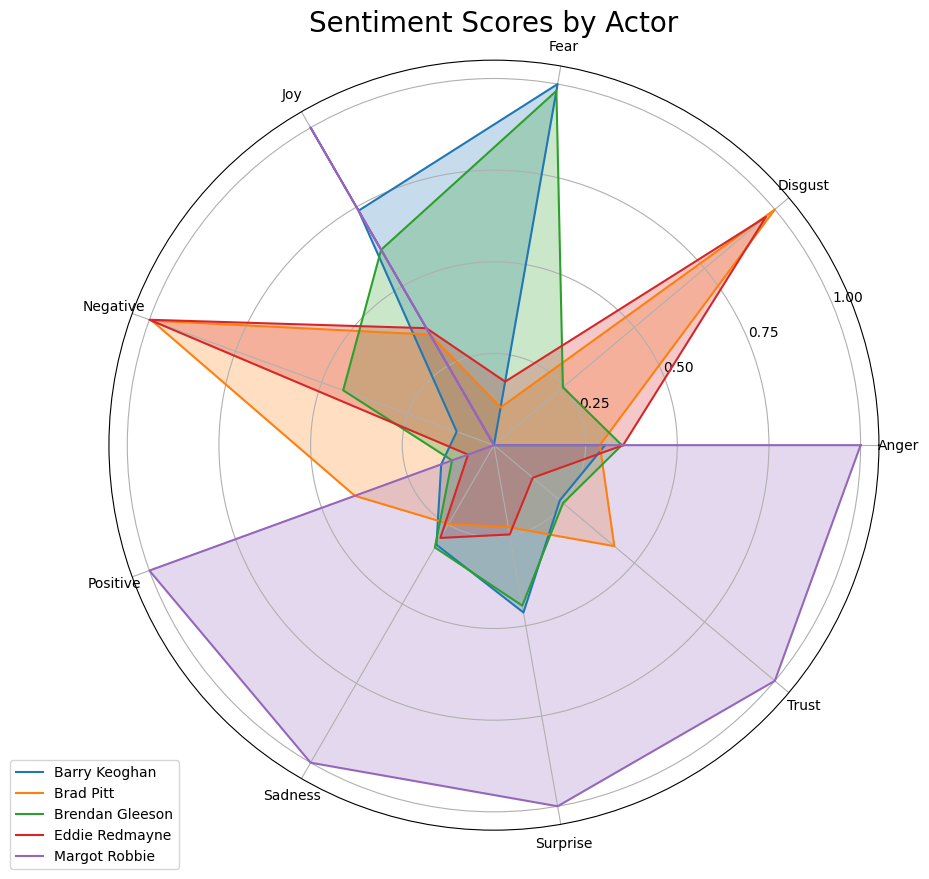

<Figure size 640x480 with 0 Axes>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# create a new column in nrc_result that extracts the actor's name from the tweet text
nrc_result['actor'] = nrc_result['Text'].apply(lambda tweet: [name for name in df['nomination-db-card__name'] if name.lower() in tweet.lower()])

# explode the 'actor' column so that each row only contains one actor's name
nrc_result = nrc_result.explode('actor')

# filter the dataframe to only include the specified actors
actors_to_plot = ['Barry Keoghan', 'Margot Robbie', 'Brendan Gleeson', 'Brad Pitt', 'Eddie Redmayne']
nrc_result = nrc_result[nrc_result['actor'].isin(actors_to_plot)]

# group by actor and calculate the mean sentiment scores
sentiment_cols = ['Anger', 'Disgust', 'Fear', 'Joy', 'Negative', 'Positive', 'Sadness', 'Surprise', 'Trust']
actor_sentiment_means = nrc_result.groupby('actor')[sentiment_cols].mean()

# normalize the sentiment scores for each actor
actor_sentiment_norm = actor_sentiment_means.copy()
for col in sentiment_cols:
    max_val = actor_sentiment_norm[col].max()
    actor_sentiment_norm[col] = actor_sentiment_norm[col] / max_val

# plot the radar chart
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)

# create a list of angles for each of the sentiment columns
angles = [n / float(len(sentiment_cols)) * 2 * 3.14159 for n in range(len(sentiment_cols))]
angles += angles[:1]

# plot each actor's sentiment scores on the radar chart
for i, actor in enumerate(actor_sentiment_norm.index):
    scores = actor_sentiment_norm.iloc[i].tolist()
    scores += scores[:1]
    ax.plot(angles, scores, label=actor)
    ax.fill(angles, scores, alpha=0.25)

# add legend and set title
ax.set_title('Sentiment Scores by Actor', fontsize=20)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# set the radial ticks and labels
radial_ticks = [0.25, 0.5, 0.75, 1.0]
radial_labels = ['{:.2f}'.format(tick) for tick in radial_ticks]
ax.set_rticks(radial_ticks)
ax.set_yticklabels(radial_labels)

# set the angle ticks and labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(sentiment_cols)

# show the chart
plt.show()

plt.savefig('all_actors_radar.png', format = 'png')

##### NRC mean score normalized per actor

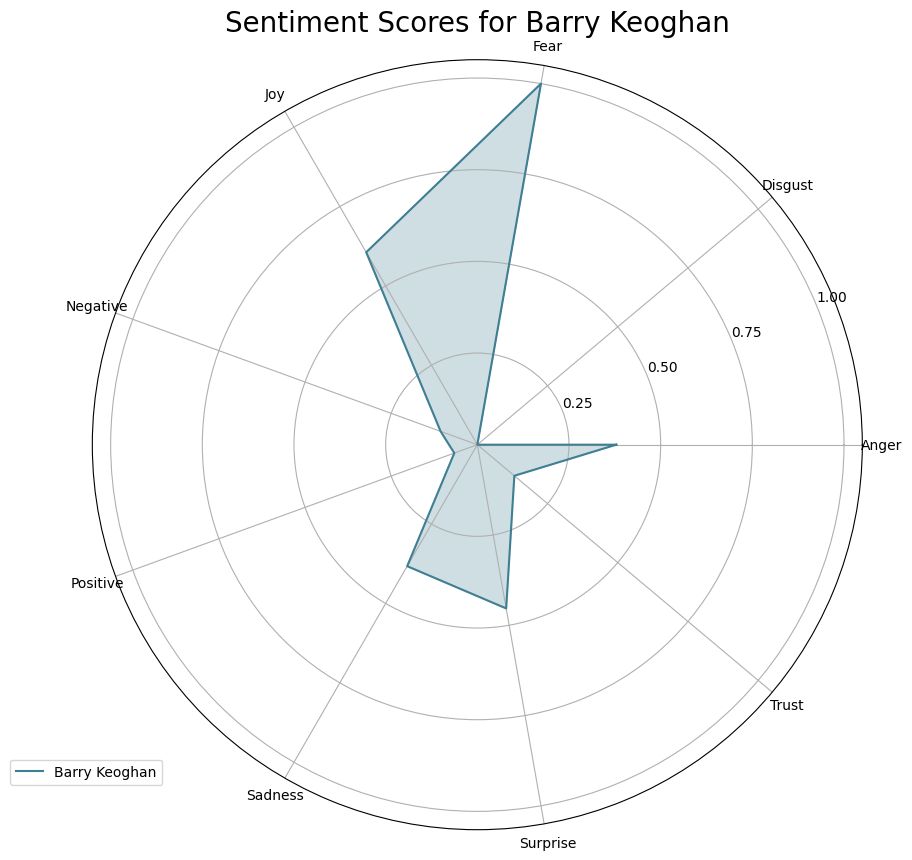

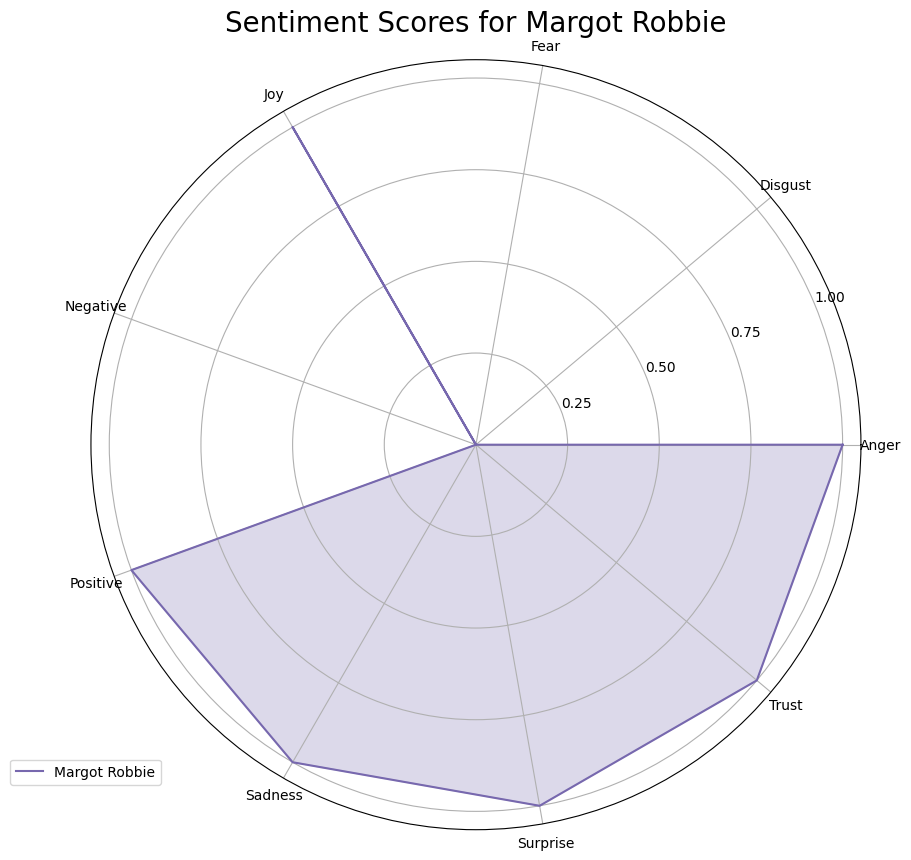

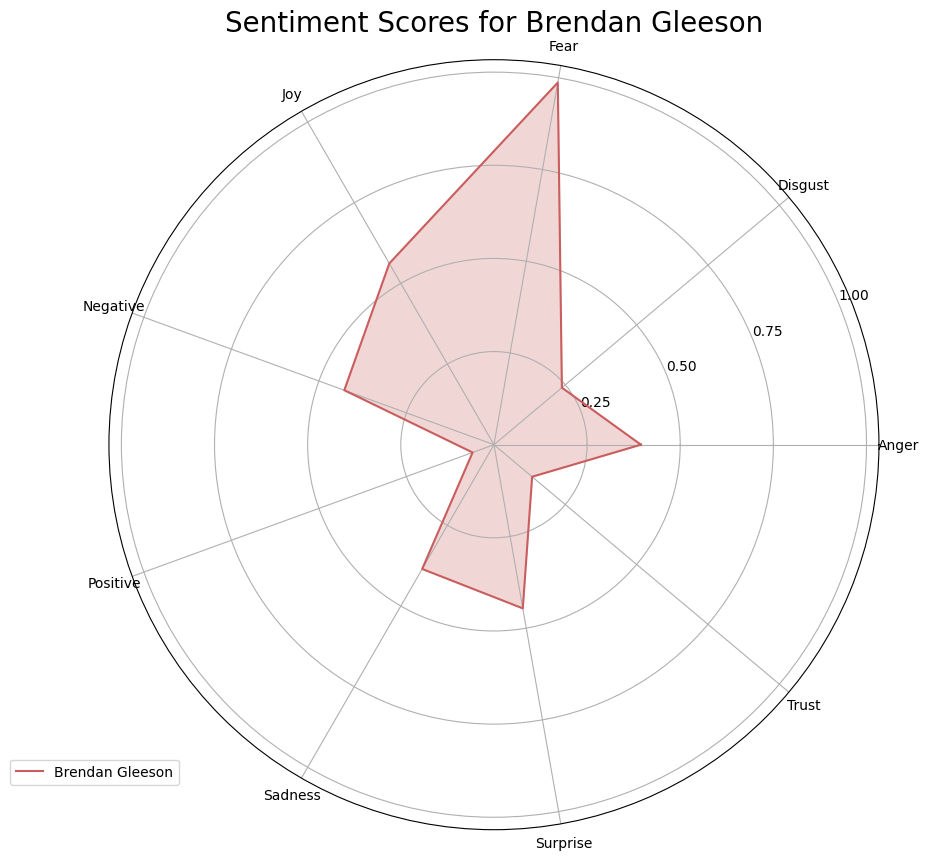

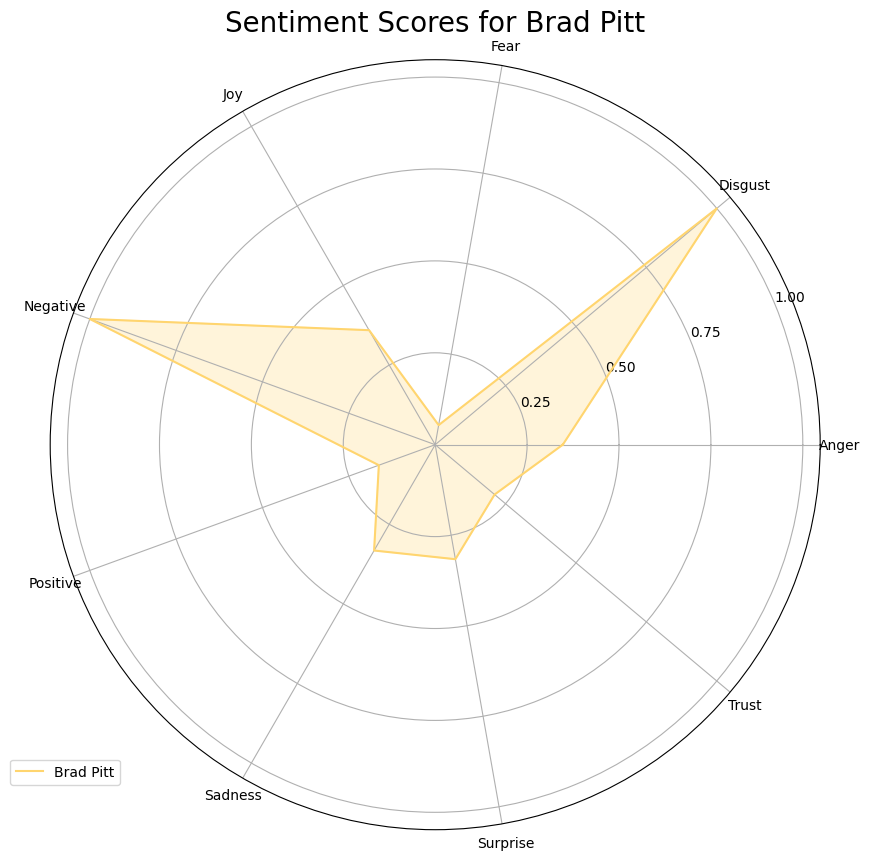

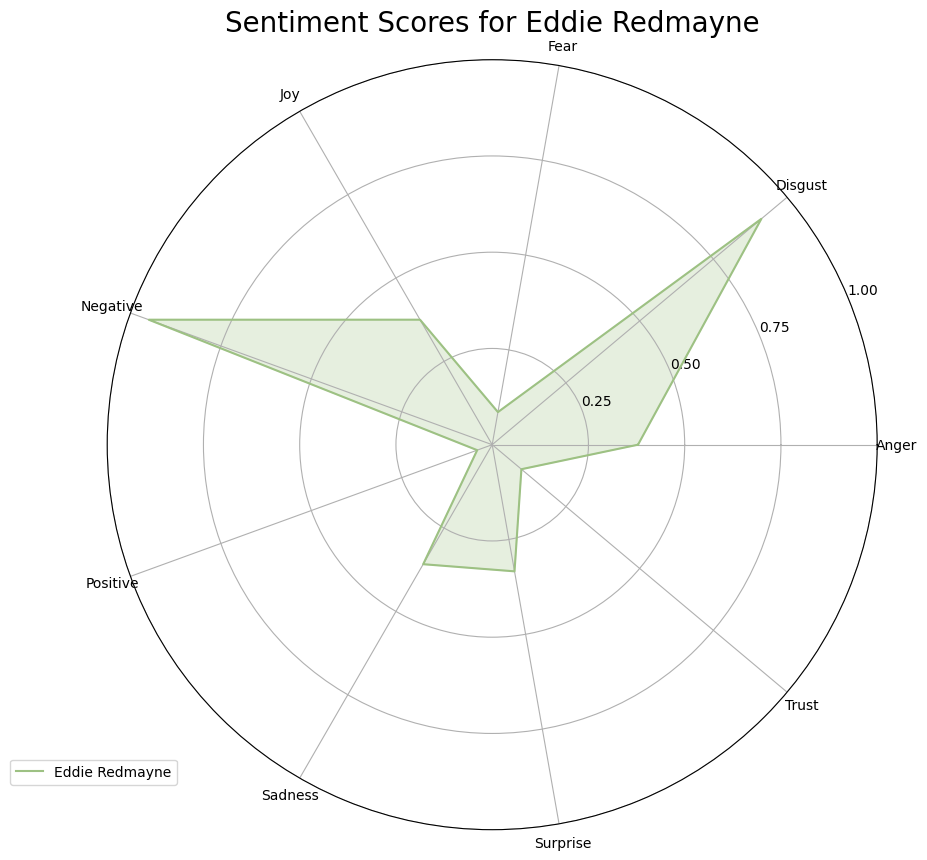

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# create a new column in nrc_result that extracts the actor's name from the tweet text
nrc_result['actor'] = nrc_result['Text'].apply(lambda tweet: [name for name in df['nomination-db-card__name'] if name.lower() in tweet.lower()])

# explode the 'actor' column so that each row only contains one actor's name
nrc_result = nrc_result.explode('actor')

# filter the dataframe to only include the specified actors
actors_to_plot = ['Barry Keoghan', 'Margot Robbie', 'Brendan Gleeson', 'Brad Pitt', 'Eddie Redmayne']
nrc_result = nrc_result[nrc_result['actor'].isin(actors_to_plot)]

# group by actor and calculate the mean sentiment scores
sentiment_cols = ['Anger', 'Disgust', 'Fear', 'Joy', 'Negative', 'Positive', 'Sadness', 'Surprise', 'Trust']
actor_sentiment_means = nrc_result.groupby('actor')[sentiment_cols].mean()

# normalize the sentiment scores for each actor
actor_sentiment_norm = actor_sentiment_means.copy()
for col in sentiment_cols:
    max_val = actor_sentiment_norm[col].max()
    actor_sentiment_norm[col] = actor_sentiment_norm[col] / max_val

# set up a color palette for the radar charts
colors = ['#3f7f93', '#7768ae', '#ca5e5e', '#ffd56f', '#9dc183']

# plot a radar chart for each actor
for i, actor in enumerate(actors_to_plot):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, polar=True)

    # create a list of angles for each of the sentiment columns
    angles = [n / float(len(sentiment_cols)) * 2 * 3.14159 for n in range(len(sentiment_cols))]
    angles += angles[:1]

    # plot the actor's sentiment scores on the radar chart
    scores = actor_sentiment_norm.loc[actor].tolist()
    scores += scores[:1]
    color = colors[i % len(colors)]
    ax.plot(angles, scores, label=actor, color=color)
    ax.fill(angles, scores, alpha=0.25, color=color)

    # add legend and set title
    ax.set_title('Sentiment Scores for {}'.format(actor), fontsize=20)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # set the radial ticks and labels
    radial_ticks = [0.25, 0.5, 0.75, 1.0]
    radial_labels = ['{:.2f}'.format(tick) for tick in radial_ticks]
    ax.set_rticks(radial_ticks)
    ax.set_yticklabels(radial_labels)

    # set the angle ticks and labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(sentiment_cols)

    # show the chart
    plt.show()

    plt.show()


## Social network analysis 

#### Creation of the edges and nodes file 

In [28]:
import pandas as pd
import itertools

# Get a list of all the unique actors
actors = df['nomination-db-card__name'].unique()

# Create an empty dictionary to store the counts of each actor pair
actor_counts = {}

# Loop through each tweet in tweet_df
for tweet in tweet_df['text']:
    
    # Loop through each pair of actors
    for pair in itertools.combinations(actors, 2):
        
        # Check if both actors are mentioned in the tweet
        if pair[0] in tweet and pair[1] in tweet:
            
            # If the pair isn't in the dictionary yet, add it with a count of 1
            if pair not in actor_counts:
                actor_counts[pair] = 1
            
            # If the pair is already in the dictionary, increment its count by 1
            else:
                actor_counts[pair] += 1

# Create a dataframe from the actor_counts dictionary
edge_df = pd.DataFrame.from_dict(actor_counts, orient='index', columns=['weight'])

# Reset the index and rename the columns
edge_df = edge_df.reset_index().rename(columns={'index': 'source_target'})

# Split the source_target column into separate source and target columns
edge_df[['source', 'target']] = pd.DataFrame(edge_df['source_target'].tolist())

# Drop the source_target column
edge_df = edge_df.drop('source_target', axis=1)

# Save the actors and edges dataframes to csv files
actors_df = pd.DataFrame({'actor': actors})
actors_df.to_csv('actors.csv', index=False)

edge_df.to_csv('edges.csv', index=False)


In [29]:
edge_df

,weight,source,target
0,2,Jennifer Coolidge,Brendan Fraser
1,3,Jennifer Coolidge,Michelle Yeoh
2,17,Jennifer Coolidge,Jenna Ortega
3,59,Jennifer Coolidge,Aubrey Plaza
4,1,Jennifer Coolidge,Dolly de Leon
...,...,...,...
534,1,Adam Driver,Andrew Garfield
535,1,Adam Driver,Lily James
536,1,Andrew Garfield,Colin Farrell
537,1,Colin Farrell,Lily James


In [30]:
actors

array(['Lesley Manville', 'Ke Huy Quan', 'Paul Walter Hauser',
       'Michelle Williams', 'Janelle James', "Emma D'Arcy",
       'Jennifer Coolidge', 'Brendan Fraser', 'Hugh Jackman',
       'Bill Nighy', 'Daniel Craig', 'Eddie Redmayne', 'Donald Glover',
       'Daisy Edgar-Jones', 'Seth Rogen', 'Margot Robbie', 'Diego Calva',
       'Jamie Lee Curtis', 'Elizabeth Debicki', 'Taron Egerton',
       'Julia Garner', 'Cate Blanchett', 'Amanda Seyfried',
       'Angela Bassett', 'Jeremy Allen White', 'Niecy Nash-Betts',
       'Richard Jenkins', 'Brendan Gleeson', 'F. Murray Abraham',
       'Carey Mulligan', 'Colin Firth', 'Claire Danes', 'Julia Roberts',
       'Sebastian Stan', 'Bob Odenkirk', 'Quinta Brunson', 'Kerry Condon',
       'Barry Keoghan', 'Michelle Yeoh', 'Brad Pitt', 'Hannah Einbinder',
       'John Lithgow', 'Jean Smart', 'Zendaya', 'Ana de Armas',
       'Emma Thompson', 'Adam Driver', 'Andrew Garfield', 'Kevin Costner',
       'Evan Peters', 'John Turturro', 'Jonathan P

#### Cleaning the edges files

In [31]:
import pandas as pd
import itertools

# Get a list of all the unique actors
actors = df['nomination-db-card__name'].unique()

# Create an empty dictionary to store the counts of each actor pair
actor_counts = {}

# Loop through each tweet in tweet_df
for tweet in tweet_df['text']:
    
    # Loop through each pair of actors
    for pair in itertools.combinations(actors, 2):
        
        # Check if both actors are mentioned in the tweet
        if pair[0] in tweet and pair[1] in tweet:
            
            # If the pair isn't in the dictionary yet, add it with a count of 1
            if pair not in actor_counts:
                actor_counts[pair] = 1
            
            # If the pair is already in the dictionary, increment its count by 1
            else:
                actor_counts[pair] += 1

# Create a dataframe from the actor_counts dictionary
edge_df = pd.DataFrame.from_dict(actor_counts, orient='index', columns=['weight'])

# Reset the index and rename the columns
edge_df = edge_df.reset_index().rename(columns={'index': 'source_target'})

# Split the source_target column into separate source and target columns
edge_df[['source', 'target']] = pd.DataFrame(edge_df['source_target'].tolist())

# Add a column for the type
edge_df['type'] = 'direct'

# Reorder the columns
edge_df = edge_df[['source', 'target', 'type', 'weight']]

# Save the actors and edges dataframes to csv files
actors_df = pd.DataFrame({'actor': actors})
actors_df.to_csv('actors.csv', index=False)

edge_df.to_csv('edges.csv', index=False)


In [32]:
edge_df

,source,target,type,weight
0,Jennifer Coolidge,Brendan Fraser,direct,2
1,Jennifer Coolidge,Michelle Yeoh,direct,3
2,Jennifer Coolidge,Jenna Ortega,direct,17
3,Jennifer Coolidge,Aubrey Plaza,direct,59
4,Jennifer Coolidge,Dolly de Leon,direct,1
...,...,...,...,...
534,Adam Driver,Andrew Garfield,direct,1
535,Adam Driver,Lily James,direct,1
536,Andrew Garfield,Colin Farrell,direct,1
537,Colin Farrell,Lily James,direct,1


#### Creation of the social network

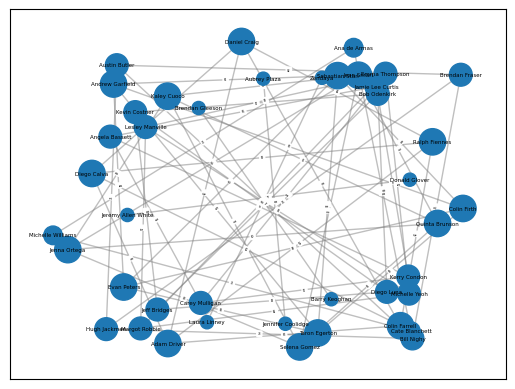

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph object
G = nx.Graph()

# Add nodes for each actor that is incident to an edge with weight 50
for actor in actors_df['actor']:
    if actor in edge_df.loc[edge_df['weight'] == 50, ['source', 'target']].values:
        G.add_node(actor)

# Add edges between actors with a weight of at least 1
for index, row in edge_df.iterrows():
    source = row['source']
    target = row['target']
    weight = row['weight']
    if weight >= 50:
        G.add_edge(source, target, weight=weight)

# Calculate the degree of each node and use it to scale the node size
node_sizes = [deg*90 for _, deg in G.degree()]
# Draw the graph with node labels and edge weights
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes)
nx.draw_networkx_labels(G, pos, font_size=4, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=2)

# Save the graph to a file
plt.savefig('graph2.png', dpi=300)
plt.show()

#### Use of the community louvain detection algorithm 

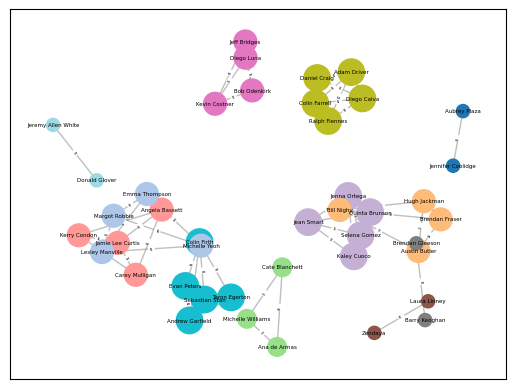

In [34]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community

# Create an empty graph object
G = nx.Graph()

# Add nodes for each actor that is incident to an edge with weight 50
for actor in actors_df['actor']:
    if actor in edge_df.loc[edge_df['weight'] == 50, ['source', 'target']].values:
        G.add_node(actor)

# Add edges between actors with a weight of at least 1
for index, row in edge_df.iterrows():
    source = row['source']
    target = row['target']
    weight = row['weight']
    if weight >= 50:
        G.add_edge(source, target, weight=weight)

# Perform Louvain community detection
partition = community.best_partition(G)

# Calculate the degree of each node and use it to scale the node size
node_sizes = [deg*90 for _, deg in G.degree()]

# Draw the graph with node labels, community colors, and edge weights
pos = nx.spring_layout(G, k=0.9, iterations=12)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=list(partition.values()), cmap=plt.cm.tab20)
nx.draw_networkx_labels(G, pos, font_size=4, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=2)

# Save the graph to a file
plt.savefig('graph.png', dpi=300)
plt.show()

